## **IMPORT LIBRARIES AND CLEANING DATASET**


In [ ]:
# Core libraries
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from scipy.stats import f_oneway

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate

# Evaluation
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
from sklearn.feature_selection import RFE, SelectKBest, f_classif

# Pipeline
from sklearn.pipeline import Pipeline

# Dictionary that stores all machine learning models to be evaluated
# Each model will be trained and tested using the same dataset
# This allows fair comparison of model performance

models = {

    # Logistic Regression:
    # A baseline and interpretable model commonly used in medical prediction.
    # It helps understand how different health indicators influence diabetes risk.
    "Logistic Regression": LogisticRegression(
        max_iter=1000,           # Increase iterations to ensure convergence
        class_weight="balanced" # Handle class imbalance between diabetic and non-diabetic cases
    ),

    # Decision Tree:
    # A rule-based model that splits data using decision rules.
    # Easy to interpret but may overfit on training data.
    "Decision Tree": DecisionTreeClassifier(
        random_state=42          # Ensures reproducibility of results
    ),

    # Random Forest:
    # An ensemble model made of multiple decision trees.
    # Reduces overfitting and improves prediction accuracy.
    "Random Forest": RandomForestClassifier(
        n_estimators=200,        # Number of trees in the forest
        random_state=42,         # Ensures reproducible results
        n_jobs=-1                # Use all available CPU cores
    ),

    # Gradient Boosting:
    # Builds trees sequentially to correct errors from previous trees.
    # Effective for capturing complex relationships in data.
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),

    # AdaBoost:
    # Boosting algorithm that focuses more on misclassified samples.
    # Useful for improving weak learners in classification tasks.
    "AdaBoost": AdaBoostClassifier(
        random_state=42
    )

    
}


### **PROJECT PROGRESS 2**

In [2]:
# Load dataset
df = pd.read_csv(
    "diabetes_dataset.csv",
    encoding="latin1",
    engine="python",
    on_bad_lines="skip"
)
print("Shape of dataset:", df.shape)


df.head()
df.info()


Shape of dataset: (70692, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_012          70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              7

In [3]:
# Check if there are missing values

df.isna().sum() # no missing values

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [5]:
# Check the target variables of the original dataset
# 0 is for no diabetes or only during pregnancy, 
# 1 is for pre-diabetes or borderline diabetes, 
# and 2 is for yes diabetes
df['Diabetes_012'].value_counts().sort_index()

Diabetes_012
0    35346
1    35346
Name: count, dtype: int64

In [6]:

# Convert 1 and 2 into diabetic class (1)
df['Diabetes_012'] = df['Diabetes_012'].replace({1:1, 2:1})


In [7]:
# Change the column name to Diabetes_binary
df = df.rename(columns = {'Diabetes_012': 'Diabetes_binary'})

In [8]:
# Print the count od the diabtes cases
# 0 - non diabetic
# 1 - diabetic
print("\nTarget distribution (Diabetes_binary):")
print(df["Diabetes_binary"].value_counts()) 



Target distribution (Diabetes_binary):
Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64


In [9]:
# ----------------------------------------
# Separate feature columns by data type
# ----------------------------------------

# Define the target (label) column
target = 'Diabetes_binary'

# Identify binary feature columns:
# - Columns that contain exactly two unique values (e.g., 0 and 1)
# - Exclude the target variable from this list
binary_col = [
    col for col in df.columns
    if df[col].nunique() == 2 and col != target
]

# Identify numerical / non-binary feature columns:
# - All remaining columns excluding binary features and the target variable
# - This helps distinguish features that may require different preprocessing steps
num_col = [
    col for col in df.columns.difference(binary_col)
    if col != target
]

# Display the separated feature groups
print('Binary Columns: ', binary_col)
print('Numerical Columns: ', num_col)


Binary Columns:  ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Numerical Columns:  ['Age', 'BMI', 'Education', 'GenHlth', 'Income', 'MentHlth', 'PhysHlth']


### **PROJECT PROGRESS 3**
Exploratory Data Analysis (EDA) was conducted to understand the structure, quality, and distribution of the data, as well as to identify patterns and relationships relevant to diabetes risk prediction.

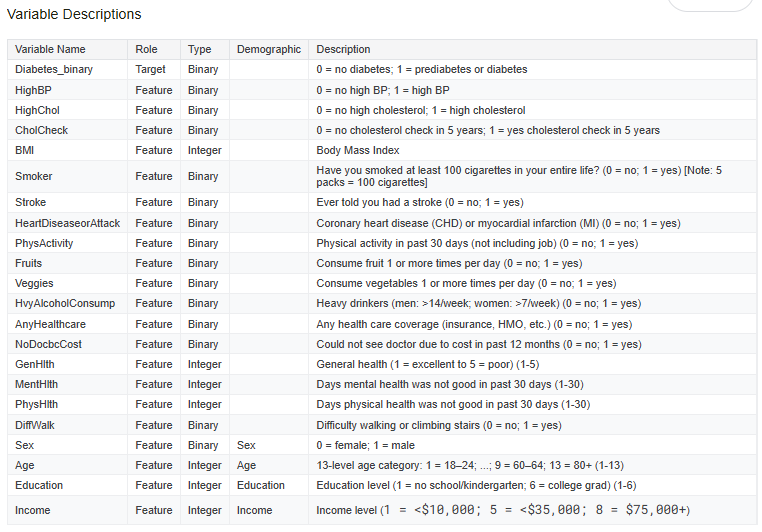

In [11]:
# --- Basic Grouping ---
# Calculate mean values of key health indicators by diabetes status

key_features = [
    'BMI',
    'GenHlth',
    'PhysHlth',
    'MentHlth',
    'Age',
    'HighBP',
    'HighChol',
    'PhysActivity'
]

grouped_key = df.groupby('Diabetes_binary')[key_features].mean()

grouped_key


,BMI,GenHlth,PhysHlth,MentHlth,Age,HighBP,HighChol,PhysActivity
Diabetes_binary,,,,,,,,
0,27.769960,2.383183,3.666355,3.042268,7.789057,0.374243,0.381288,0.775533
1,31.944011,3.290981,7.954479,4.461806,9.379053,0.752674,0.670118,0.630538


In [ ]:
# --- ANOVA Test ---
# ANOVA was used to statistically test whether key health indicators show significant differences between diabetic and non-diabetic individuals,
# providing evidence for feature relevance before model development.
# Has p < 0.05 : statistically significant
# Has p ≥ 0.05 : weak or no evidence
# The F value measures how different the group means are relative to the variation within each group.

features_for_anova = [
    'BMI',
    'GenHlth',
    'PhysHlth',
    'MentHlth',
    'Age',
    'Education',
    'Income'
]

for feature in features_for_anova:
    group0 = df[df['Diabetes_binary'] == 0][feature]
    group1 = df[df['Diabetes_binary'] == 1][feature]
    
    f_stat, p_val = f_oneway(group0, group1)
    
    print(f"{feature} -> F={f_stat:.2f}, p={p_val:.5f}")
    
    if p_val < 0.05:
        print(f" >> Significant difference between groups for {feature}\n")
    else:
        print(f"  >> No significant difference between groups for {feature}\n")


BMI -> F=6657.07, p=0.00000
 >> Significant difference between groups for BMI

GenHlth -> F=14085.16, p=0.00000
 >> Significant difference between groups for GenHlth

PhysHlth -> F=3362.23, p=0.00000
 >> Significant difference between groups for PhysHlth

MentHlth -> F=539.49, p=0.00000
 >> Significant difference between groups for MentHlth

Age -> F=5954.92, p=0.00000
 >> Significant difference between groups for Age

Education -> F=2116.01, p=0.00000
 >> Significant difference between groups for Education

Income -> F=3750.08, p=0.00000
 >> Significant difference between groups for Income



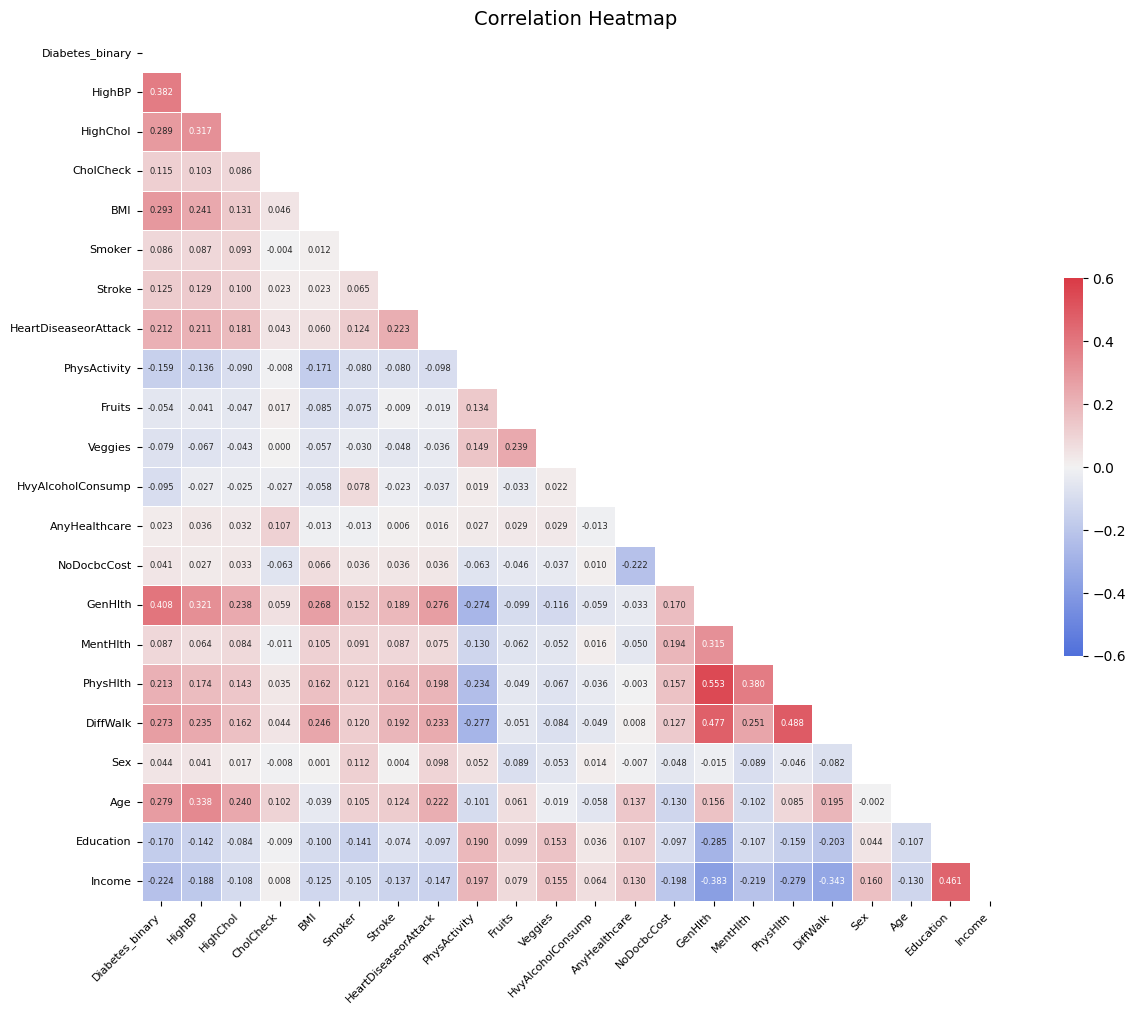

In [ ]:
# Correlations between variables
#A correlation heatmap is used to visualize the strength and direction of relationships between numerical features in your dataset.
# For example:
# PysHlth + Genhlth = 0.524
# Meaning that, physical health problems are strongly associated with poor general health

# Generate a correlation matrix (numeric columns only)
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up plot figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,
    annot_kws={"size": 6},
    fmt='.3f',
    vmax=0.6,
    vmin=-0.6,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.35},
    ax=ax
)

# Set title and formatting
ax.set_title('Correlation Heatmap', fontsize=14)
ax.tick_params(axis='both', labelsize=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# IMPORTANT: show plot only
plt.show()


### TARGET VARIABLE

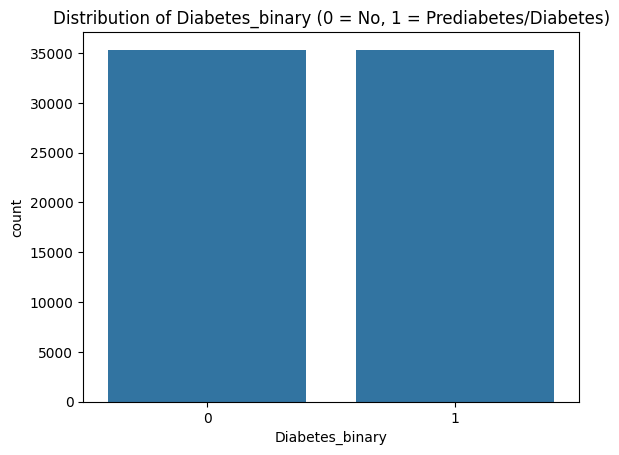

In [21]:
# Visualize target distribution
sns.countplot(x="Diabetes_binary", data=df)
plt.title("Distribution of Diabetes_binary (0 = No, 1 = Prediabetes/Diabetes)")
plt.show()


In [22]:
print(df[target].value_counts(normalize=True).sort_index().map(lambda x: f'{x: .3%}'))

Diabetes_binary
0     50.000%
1     50.000%
Name: proportion, dtype: object


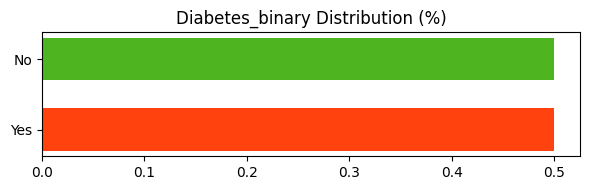

In [23]:
# Define a function to plot a bar chart of diabetes distribution
def plot_barchart_diabetes(df, col=target):

    # Calculate proportions
    ratios = df[col].value_counts(normalize=True).sort_index()

    labels = ['No', 'Yes']
    y_pos = [0.75, 0.25]

    # Two different colors for the two classes
    colors = ["#4eb41f", "#ff420e"]    # green for No, red for Yes

    plt.figure(figsize=(6, 2))

    # Plot each bar separately with different colors
    plt.barh(y_pos[0], ratios.iloc[0], height=0.3, color=colors[0])
    plt.barh(y_pos[1], ratios.iloc[1], height=0.3, color=colors[1])

    plt.yticks(y_pos, labels)
    plt.title(f'{col} Distribution (%)')

    plt.tight_layout()
    plt.show()

# Display the distribution
plot_barchart_diabetes(df)


In [24]:

# FEATURE SELECTION 

target = "Diabetes_binary"

features = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
    'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'MentHlth', 'PhysHlth',
    'DiffWalk', 'Sex', 'Age',
    'Education', 'Income'
]

# Create X (features) and y (target)
X = df[features]
y = df["Diabetes_binary"]

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)



Feature matrix shape: (70692, 21)
Target vector shape: (70692,)


### BINARY VARIABLE

In [30]:
# Display value counts for each binary feature column
for col in binary_col:
    print(df[col].value_counts(sort=False).sort_index())
    print()

HighBP
0    30860
1    39832
Name: count, dtype: int64

HighChol
0    33529
1    37163
Name: count, dtype: int64

CholCheck
0     1749
1    68943
Name: count, dtype: int64

Smoker
0    37094
1    33598
Name: count, dtype: int64

Stroke
0    66297
1     4395
Name: count, dtype: int64

HeartDiseaseorAttack
0    60243
1    10449
Name: count, dtype: int64

PhysActivity
0    20993
1    49699
Name: count, dtype: int64

Fruits
0    27443
1    43249
Name: count, dtype: int64

Veggies
0    14932
1    55760
Name: count, dtype: int64

HvyAlcoholConsump
0    67672
1     3020
Name: count, dtype: int64

AnyHealthcare
0     3184
1    67508
Name: count, dtype: int64

NoDocbcCost
0    64053
1     6639
Name: count, dtype: int64

DiffWalk
0    52826
1    17866
Name: count, dtype: int64

Sex
0    38386
1    32306
Name: count, dtype: int64



In [31]:
# Define function for creating a pie chart for binary variables

def binary_var_pie(var):
    
    # Group the data
    grouped = df.groupby([target, var]).size().unstack()
    
    # Label the binary variable to blue if No, red if Yes
    labels = ['No', 'Yes']
    colors = ['#4eb41f', '#C62E2E']
    
    # Create space (1 row * 2 columns) for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # Pie chart for no diabetes
    axes[0].pie(grouped.iloc[0], colors=colors, autopct='%.1f%%', startangle=90)
    axes[0].set_xlabel('No Diabetes', fontsize=10, labelpad=2)
    
    # Pie chart for diabetes
    axes[1].pie(grouped.iloc[1], colors=colors, autopct='%.1f%%', startangle=90)
    axes[1].set_xlabel('Diabetes', fontsize=10, labelpad=2)
    
    # Add a main title
    plt.suptitle(f'{var} Distribution (%)', fontsize=14, fontweight='bold')
    
    # Create a legend elements
    legend_elements = [
        Patch(facecolor=colors[0], label=labels[0]),
        Patch(facecolor=colors[1], label=labels[1])
    ]
    
    # Add a legend
    fig.legend(
        handles=legend_elements,
        loc='upper right',
        bbox_to_anchor=(1, 0.95),
        frameon=False
    )

    # Add a box around the entire figure
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(1)
    
    plt.tight_layout(pad=1.3)
    plt.show()

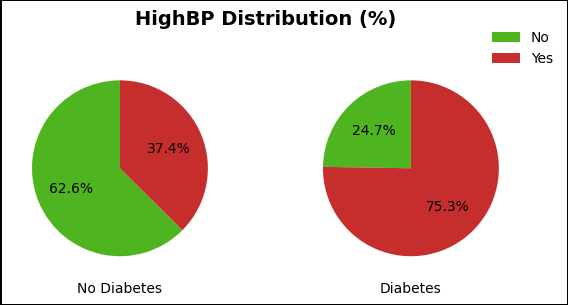

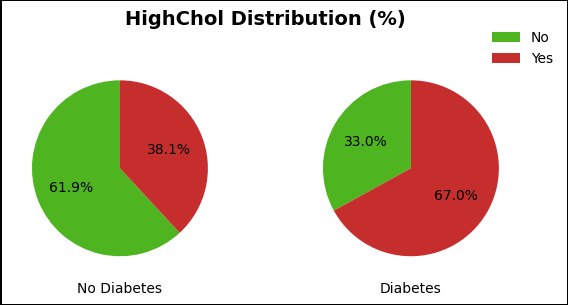

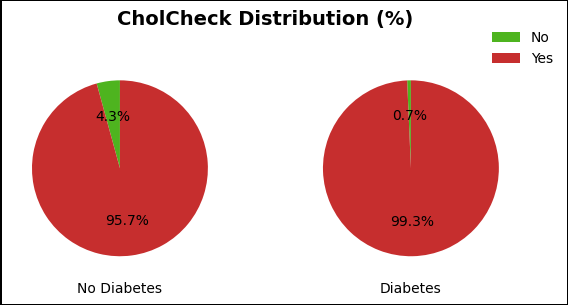

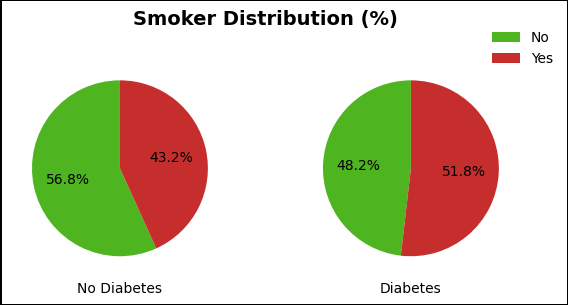

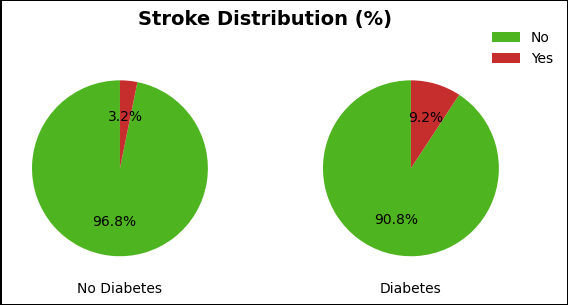

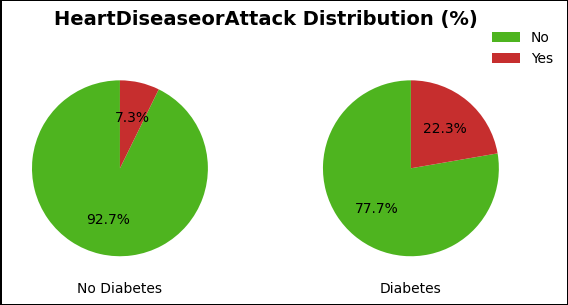

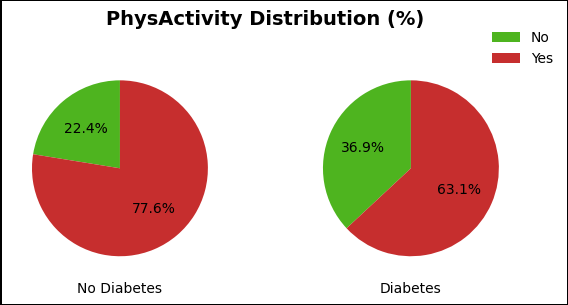

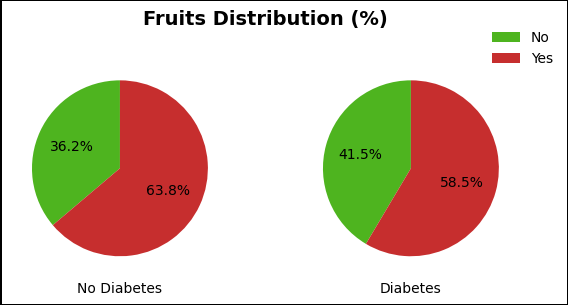

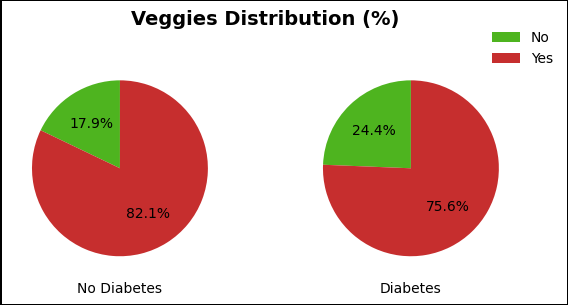

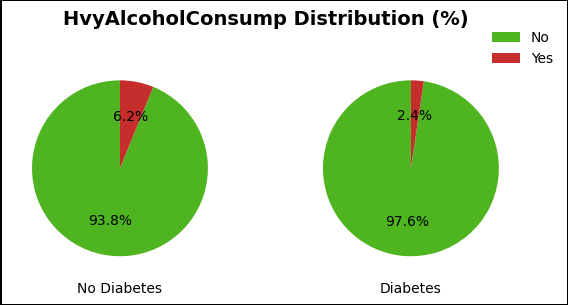

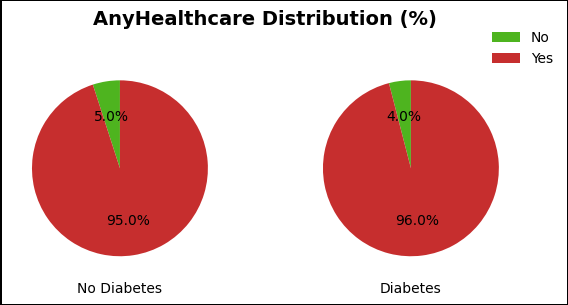

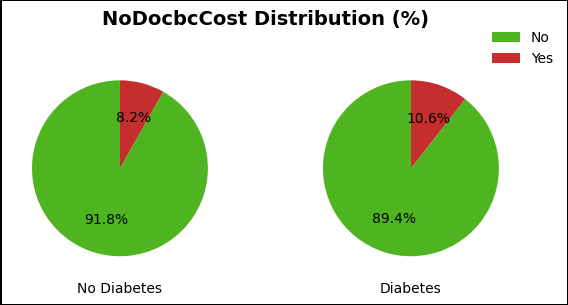

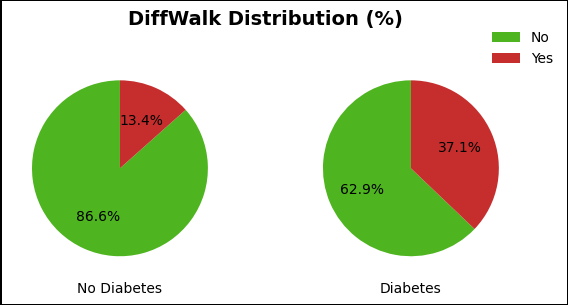

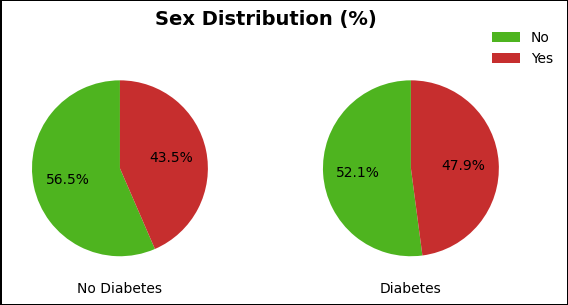

In [32]:
# Create pie charts for all binary variables
for col in binary_col:
    binary_var_pie(col)

### NUMERICAL VARIABLE

In [27]:
# Overview of the numerical variables (1) : Number of unique values
print(f'Number of unique values:')
print(df[num_col].nunique())

Number of unique values:
Age          13
BMI          80
Education     6
GenHlth       5
Income        8
MentHlth     31
PhysHlth     31
dtype: int64


In [28]:
# Overview of the numerical variables (2): Mean values for No Diabetes and Diabetes Groups
for col in num_col:
    print(f'<Mean values of {col}>')
    print(df.groupby(target)[col].mean())
    print()

<Mean values of Age>
Diabetes_binary
0    7.789057
1    9.379053
Name: Age, dtype: float64

<Mean values of BMI>
Diabetes_binary
0    27.769960
1    31.944011
Name: BMI, dtype: float64

<Mean values of Education>
Diabetes_binary
0    5.096390
1    4.745516
Name: Education, dtype: float64

<Mean values of GenHlth>
Diabetes_binary
0    2.383183
1    3.290981
Name: GenHlth, dtype: float64

<Mean values of Income>
Diabetes_binary
0    6.186527
1    5.210094
Name: Income, dtype: float64

<Mean values of MentHlth>
Diabetes_binary
0    3.042268
1    4.461806
Name: MentHlth, dtype: float64

<Mean values of PhysHlth>
Diabetes_binary
0    3.666355
1    7.954479
Name: PhysHlth, dtype: float64



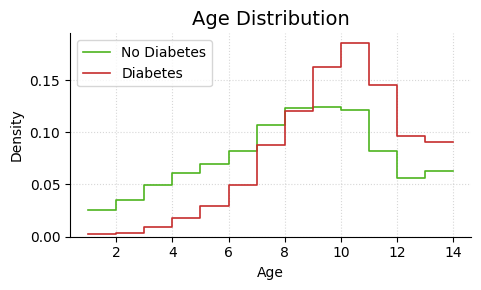

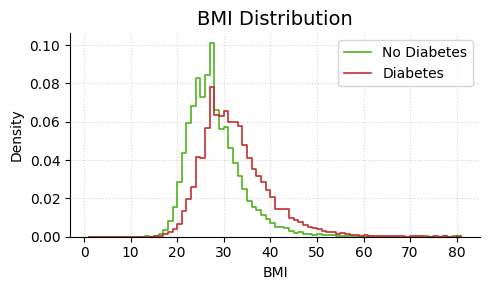

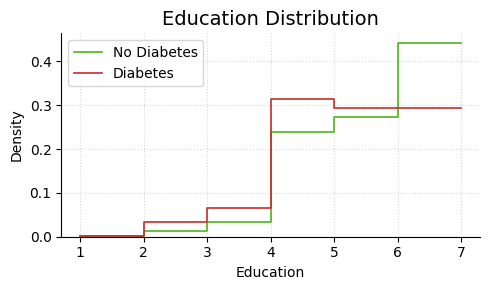

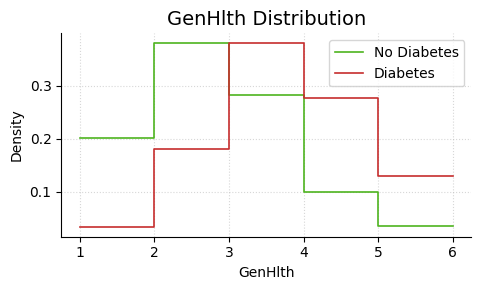

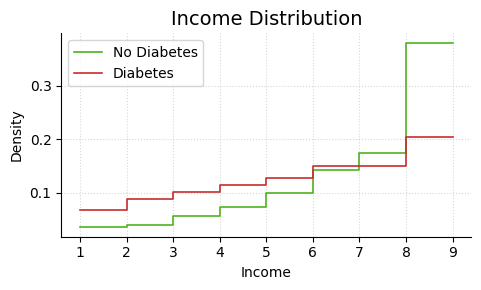

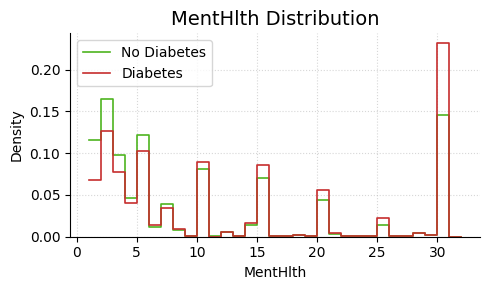

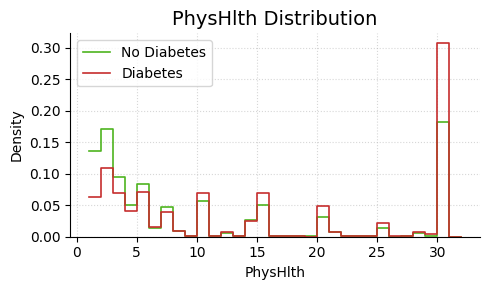

In [26]:
# Define function for creating a histogram for numerical variable

def num_var_line(var):

    # Count the number of unique values
    num_unique_vals = df[var].nunique()
    
    # Seperate numerical variables by diabetes status
    num_var_no = df[df[target] == 0][var]
    num_var_yes = df[df[target] == 1][var]
    
    # Create plot space
    plt.figure(figsize=(5, 3))
    
    # Plot histogram for no diabetes and diabetes
    # while suppressing future warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.histplot(num_var_no, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='No Diabetes',
                     color='#4eb41f',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.histplot(num_var_yes, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='Diabetes',
                     color='#C62E2E',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
    
    # Format the plot
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    
    # Remove top and right spines
    plt.gca().spines[['top', 'right']].set_visible(False)
    
    # Add grid lines and legend
    plt.grid(axis='both', linestyle=':', alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
# Create histograms for all numerical variables
for col in num_col:
    num_var_line(col)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'GenHlth'),
  Text(1, 0, 'HighBP'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'HighChol'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'DiffWalk'),
  Text(6, 0, 'PhysHlth'),
  Text(7, 0, 'HeartDiseaseorAttack'),
  Text(8, 0, 'Stroke'),
  Text(9, 0, 'CholCheck'),
  Text(10, 0, 'MentHlth'),
  Text(11, 0, 'Smoker'),
  Text(12, 0, 'Sex'),
  Text(13, 0, 'NoDocbcCost'),
  Text(14, 0, 'AnyHealthcare'),
  Text(15, 0, 'Fruits'),
  Text(16, 0, 'Veggies'),
  Text(17, 0, 'HvyAlcoholConsump'),
  Text(18, 0, 'PhysActivity'),
  Text(19, 0, 'Education'),
  Text(20, 0, 'Income')])

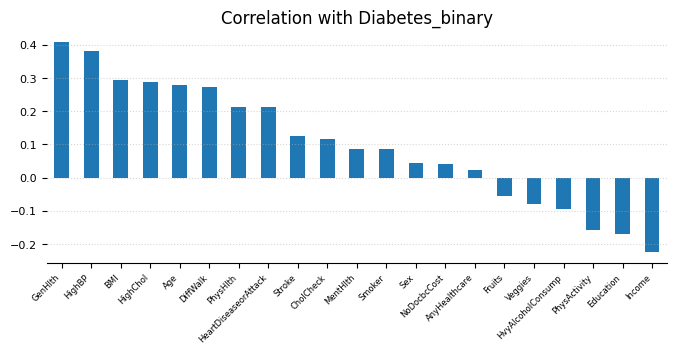

In [25]:
# Correlation with the target variable (Diabetes_binary)

# Create an array of correlation between target variables and others
# sorted in descending order
corr_target = corr[target].drop(target).sort_values(ascending=False)

# Create a bar graph
corr_target_graph = corr_target.plot(kind='bar', figsize=(8, 3))

# Set the title and change the font size of y labels
corr_target_graph.set_title('Correlation with Diabetes_binary', fontsize=12)
corr_target_graph.tick_params(axis='y', labelsize=8)

# Remove the spines of top, left and right
corr_target_graph.spines[['top', 'left', 'right']].set_visible(False)

# Add horizontal grids
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Rotate the x labes
plt.xticks(rotation = 45, ha='right', size=6)

### HANDLE OUTLIERS
Outlier analysis was conducted to identify extreme values in numerical features such as BMI and physical health indicators. Outliers were handled to reduce their influence on model training, improve prediction stability, and enhance the overall reliability of the machine learning models.

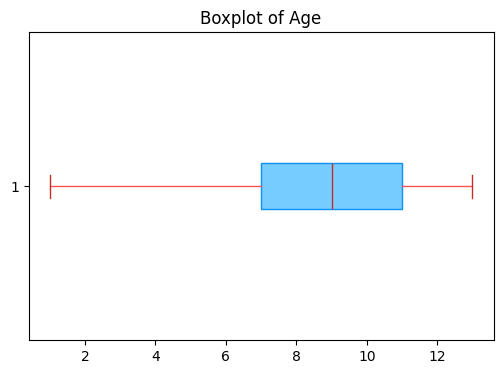

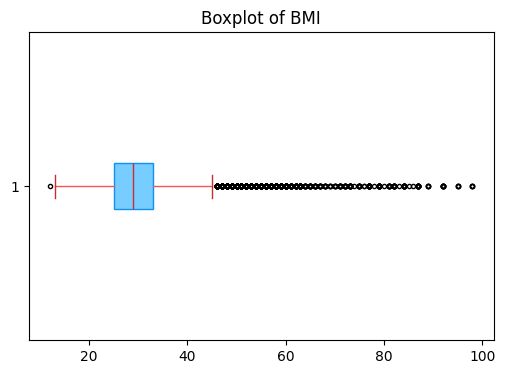

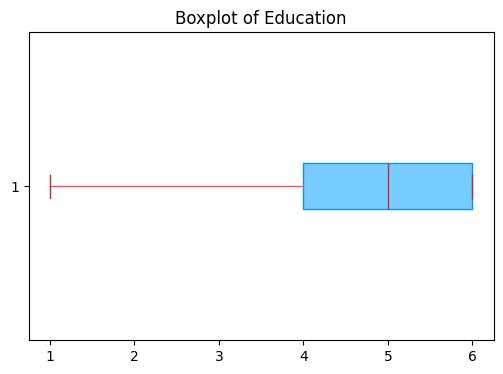

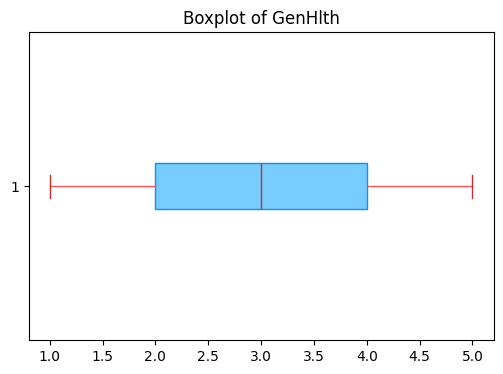

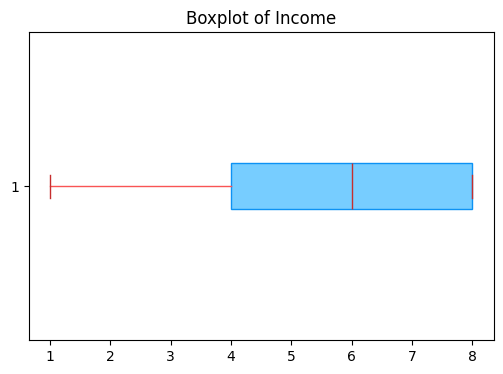

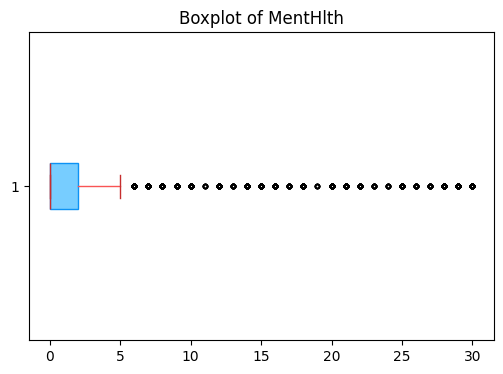

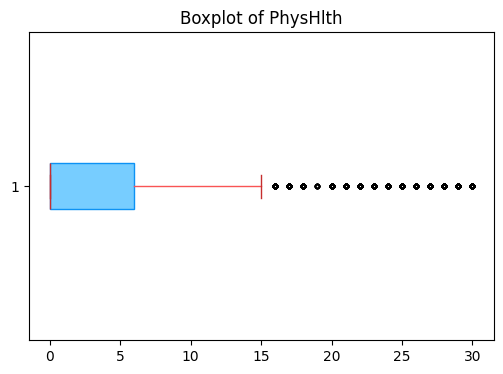

In [33]:
# Define function for creating boxplot
def plot_boxplot(df, col):
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        df[col], 
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='#77CDFF', color='#0D92F4'),
        medianprops=dict(color='#C62E2E'),
        whiskerprops=dict(color='#F95454'),
        capprops=dict(color='#C62E2E'),
        flierprops=dict(marker='o', color='#536493', markersize=3)
    )
    plt.title(f'Boxplot of {col}')

# Boxplot of numerical variables
for col in num_col:
    plot_boxplot(df, col)


In [34]:
# Define a function to find outliers in a given column
def find_outliers_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Filter only outlier rows
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

# Return rows where BMI is an outlier
df_outlier_bmi = find_outliers_iqr(df, 'BMI')
df_outlier_bmi

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
13,0,1,0,1,58,0,0,0,0,1,...,1,0,3,3,3,0,1,10,4,6
42,0,1,1,1,47,1,0,0,0,1,...,1,0,1,0,0,0,1,3,6,2
99,0,0,0,1,47,0,0,0,1,0,...,0,1,2,2,0,0,0,5,4,4
177,0,1,0,1,47,0,0,0,1,1,...,1,0,3,0,3,1,0,8,5,8
192,0,1,0,1,52,1,0,0,1,1,...,1,0,3,0,0,1,1,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70606,1,1,1,1,48,0,0,0,0,0,...,1,0,4,0,3,0,0,8,2,1
70620,1,1,1,1,46,0,0,0,0,1,...,1,0,2,14,21,1,0,10,6,2
70637,1,1,1,1,60,1,0,1,0,0,...,1,0,4,0,4,1,1,6,5,2
70645,1,1,0,1,46,0,0,1,0,0,...,1,0,3,0,0,1,0,6,6,8


Outlier handling was applied only to BMI because it is a continuous physiological measurement with a well-defined realistic range. Extremely high or low BMI values can disproportionately influence model training and are often indicative of data irregularities. Other variables are binary or ordinal with natural bounds, and their extreme values remain meaningful; therefore, they were retained to preserve important health information.

Lower Bound: 13.0
Upper Bound: 45.0


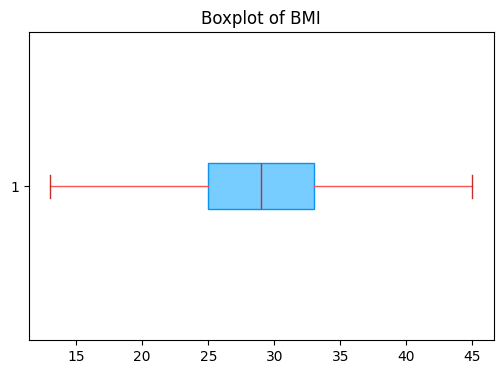

In [35]:
# Define a function to winzorize outliers
def winsorize_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # Based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    print('Lower Bound:', lower_bound)
    print('Upper Bound:', upper_bound)

    # Replace values below/above the bounds with the boundary values
    return df[col].clip(lower=lower_bound, upper=upper_bound)

df['BMI'] = winsorize_iqr(df, 'BMI')

# Boxplot of winsorized BMI
plot_boxplot(df, 'BMI')

### PROJECT PROGRESS 4
  - Simple and multiple linear regression
  - Model evaluation using visualization
  - Polynomial regression and pipelines
  - R-squared and MSE for In-Sample Evaluation
  - Prediction and decision making


=== Simple Linear Regression (BMI -> Diabetes_binary) ===
Test MSE: 0.22461344674651273
Test R2 : 0.10154620851968743


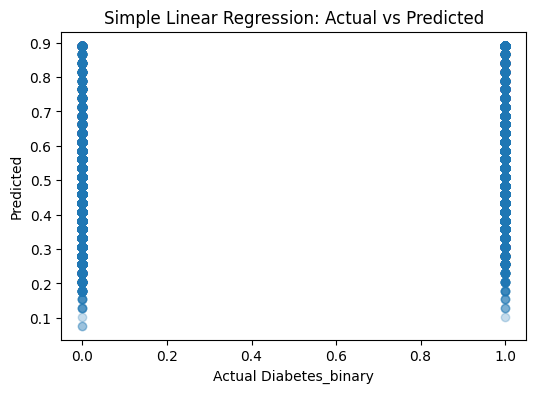

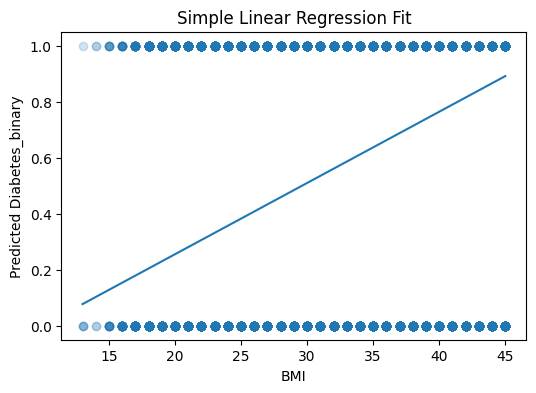


=== Multiple Linear Regression (all features) ===
Test MSE: 0.17193616695992484
Test R2 : 0.3122553287200519


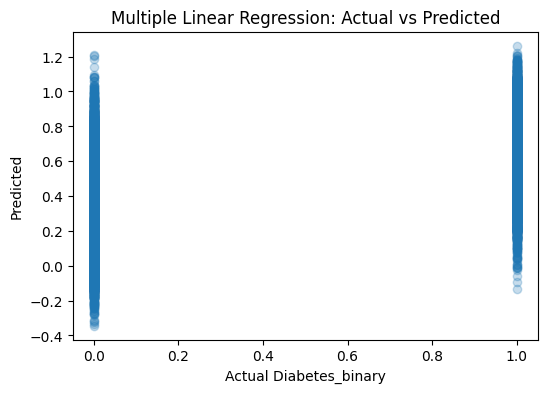


=== Polynomial Regression (degree=2, BMI only) ===
Test MSE: 0.22293801796033677
Test R2 : 0.1082479236979147


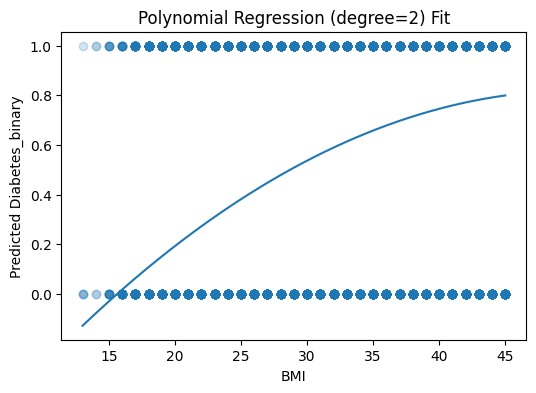


=== In-sample (Train) Evaluation Summary ===
Simple LR  - Train MSE: 0.22480990824051764  Train R2: 0.10076036675676259
Multi LR   - Train MSE: 0.1712766603531098  Train R2: 0.3148933583733473
Poly (d=2) - Train MSE: 0.22372829384627693  Train R2: 0.1050868243350781

=== Regression Model Comparison (Test Set) ===

=== Example Patient Predictions (using Multiple Linear Regression) ===
Low Risk        -> Predicted score: 0.043 -> Lower risk
Moderate Risk   -> Predicted score: 0.490 -> Lower risk
High Risk       -> Predicted score: 0.814 -> Higher risk
Very High Risk  -> Predicted score: 1.023 -> Higher risk


In [ ]:
# =========================
# Model Development (Regression)
# - Simple & multiple linear regression
# - Evaluation using visualization
# - Polynomial regression and pipelines
# - R-squared and MSE (test set comparison table)
# - Prediction & decision making (multiple example patients)
# =========================
# -------------------------
# 0) Prepare target + features
# -------------------------
df.columns = df.columns.str.strip()

# Convert Diabetes_012 -> Diabetes_binary if needed
if "Diabetes_binary" not in df.columns and "Diabetes_012" in df.columns:
    df["Diabetes_012"] = df["Diabetes_012"].replace({2: 1})  # 2 becomes 1 (diabetes)
    df = df.rename(columns={"Diabetes_012": "Diabetes_binary"})

target = "Diabetes_binary"
X_all = df.drop(columns=[target])
y = df[target]

# Split (for multiple regression)
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)

# Split (for simple & polynomial regression - BMI only)
X_simple = df[["BMI"]]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 1) Simple Linear Regression (BMI only)
# -------------------------
simple_lr = LinearRegression()
simple_lr.fit(Xs_train, ys_train)

ys_pred_train_simple = simple_lr.predict(Xs_train)
ys_pred_test_simple  = simple_lr.predict(Xs_test)

mse_simple = mean_squared_error(ys_test, ys_pred_test_simple)
r2_simple  = r2_score(ys_test, ys_pred_test_simple)

print("=== Simple Linear Regression (BMI -> Diabetes_binary) ===")
print("Test MSE:", mse_simple)
print("Test R2 :", r2_simple)

# Visualization: Actual vs Predicted (Simple)
plt.figure(figsize=(6, 4))
plt.scatter(ys_test, ys_pred_test_simple, alpha=0.25)
plt.xlabel("Actual Diabetes_binary")
plt.ylabel("Predicted")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.show()

# Visualization: Regression line (BMI vs prediction)
bmi_line = np.linspace(df["BMI"].min(), df["BMI"].max(), 200).reshape(-1, 1)
pred_line_simple = simple_lr.predict(bmi_line)

plt.figure(figsize=(6, 4))
plt.scatter(df["BMI"], y, alpha=0.10)
plt.plot(bmi_line, pred_line_simple)
plt.xlabel("BMI")
plt.ylabel("Predicted Diabetes_binary")
plt.title("Simple Linear Regression Fit")
plt.show()

# -------------------------
# 2) Multiple Linear Regression (all features)
# -------------------------
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

y_pred_train_multi = multi_lr.predict(X_train)
y_pred_test_multi  = multi_lr.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_test_multi)
r2_multi  = r2_score(y_test, y_pred_test_multi)

print("\n=== Multiple Linear Regression (all features) ===")
print("Test MSE:", mse_multi)
print("Test R2 :", r2_multi)

# Visualization: Actual vs Predicted (Multiple)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_test_multi, alpha=0.25)
plt.xlabel("Actual Diabetes_binary")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

# -------------------------
# 3) Polynomial Regression + Pipeline (BMI only, degree=2)
# -------------------------
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

poly_model.fit(Xs_train, ys_train)

ys_pred_train_poly = poly_model.predict(Xs_train)
ys_pred_test_poly  = poly_model.predict(Xs_test)

mse_poly = mean_squared_error(ys_test, ys_pred_test_poly)
r2_poly  = r2_score(ys_test, ys_pred_test_poly)

print("\n=== Polynomial Regression (degree=2, BMI only) ===")
print("Test MSE:", mse_poly)
print("Test R2 :", r2_poly)

# Visualization: Polynomial curve
pred_line_poly = poly_model.predict(bmi_line)

plt.figure(figsize=(6, 4))
plt.scatter(df["BMI"], y, alpha=0.10)
plt.plot(bmi_line, pred_line_poly)
plt.xlabel("BMI")
plt.ylabel("Predicted Diabetes_binary")
plt.title("Polynomial Regression (degree=2) Fit")
plt.show()

# -------------------------
# 4) In-sample evaluation (Train metrics)
# -------------------------
print("\n=== In-sample (Train) Evaluation Summary ===")
print("Simple LR  - Train MSE:", mean_squared_error(ys_train, ys_pred_train_simple),
      " Train R2:", r2_score(ys_train, ys_pred_train_simple))
print("Multi LR   - Train MSE:", mean_squared_error(y_train, y_pred_train_multi),
      " Train R2:", r2_score(y_train, y_pred_train_multi))
print("Poly (d=2) - Train MSE:", mean_squared_error(ys_train, ys_pred_train_poly),
      " Train R2:", r2_score(ys_train, ys_pred_train_poly))

# -------------------------
# 5) Model comparison table (Test set)
# -------------------------
results = pd.DataFrame({
    "Model": [
        "Simple Linear Regression",
        "Multiple Linear Regression",
        "Polynomial Regression (Degree 2)"
    ],
    "Test_MSE": [mse_simple, mse_multi, mse_poly],
    "Test_R2":  [r2_simple,  r2_multi,  r2_poly]
}).sort_values("Test_MSE")

print("\n=== Regression Model Comparison (Test Set) ===")
results

# -------------------------
# 6) Prediction & decision making (Multiple example patients)
# -------------------------
# Build patient profiles using the median person as baseline (ensures all columns exist)
base_patient = X_all.median().to_frame().T

patient_low_risk = base_patient.copy()
patient_low_risk["BMI"] = 22
patient_low_risk["HighBP"] = 0
patient_low_risk["HighChol"] = 0
patient_low_risk["PhysActivity"] = 1
patient_low_risk["GenHlth"] = 1

patient_moderate_risk = base_patient.copy()
patient_moderate_risk["BMI"] = 28
patient_moderate_risk["HighBP"] = 1
patient_moderate_risk["HighChol"] = 0
patient_moderate_risk["PhysActivity"] = 1
patient_moderate_risk["GenHlth"] = 3

patient_high_risk = base_patient.copy()
patient_high_risk["BMI"] = 35
patient_high_risk["HighBP"] = 1
patient_high_risk["HighChol"] = 1
patient_high_risk["PhysActivity"] = 0
patient_high_risk["GenHlth"] = 4

patient_very_high_risk = base_patient.copy()
patient_very_high_risk["BMI"] = 42
patient_very_high_risk["HighBP"] = 1
patient_very_high_risk["HighChol"] = 1
patient_very_high_risk["PhysActivity"] = 0
patient_very_high_risk["GenHlth"] = 5

patients = {
    "Low Risk": patient_low_risk,
    "Moderate Risk": patient_moderate_risk,
    "High Risk": patient_high_risk,
    "Very High Risk": patient_very_high_risk
}

print("\n=== Example Patient Predictions (using Multiple Linear Regression) ===")
for name, patient in patients.items():
    score = float(multi_lr.predict(patient)[0])
    decision = "Higher risk" if score >= 0.5 else "Lower risk"
    print(f"{name:15s} -> Predicted score: {score:.3f} -> {decision}")


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 :", r2_score(y_test, y_pred_ridge))


Ridge Regression
MSE: 0.17193615964480483
R2 : 0.31225535798053217


Ridge regression achieved an R² score of 0.31, indicating moderate explanatory power. This suggests that linear relationships alone are insufficient for diabetes prediction, supporting the use of more advanced models.

In [63]:
# Target
target = "Diabetes_binary"

# Features (21 features excluding target)
features = [c for c in df.columns if c != target]

X = df[features]
y = df[target]

# Split (stratify keeps class ratio consistent)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [64]:
models = {
    # Logistic Regression:
    # Baseline linear classifier (good benchmark).
    "Logistic Regression": LogisticRegression(
        max_iter=1000,          # Increase iterations to ensure convergence
        class_weight="balanced" # Handle class imbalance
    ),

    # Decision Tree:
    # Simple rule-based model; can overfit easily.
    "Decision Tree": DecisionTreeClassifier(
        random_state=42         # Ensures reproducibility
    ),

    # Random Forest:
    # Ensemble of trees; usually best overall performance and robust to noise.
    "Random Forest": RandomForestClassifier(
        n_estimators=200,       # Number of trees
        random_state=42,
        n_jobs=-1,              # Use all CPU cores
        class_weight="balanced" # Helps with class imbalance
    ),

    # Gradient Boosting:
    # Boosting model that builds trees sequentially to reduce errors.
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),

    # AdaBoost:
    # Boosting method focusing more on misclassified samples.
    "AdaBoost": AdaBoostClassifier(
        random_state=42
    )
}


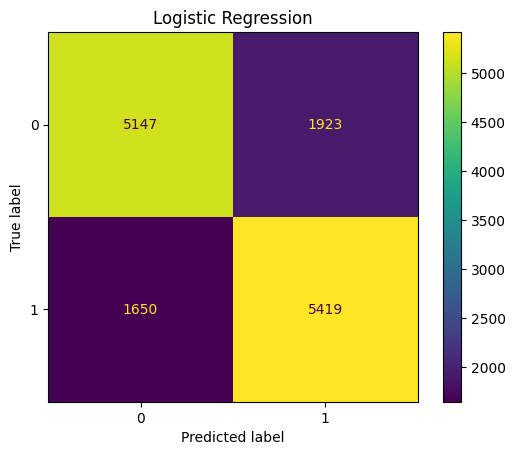

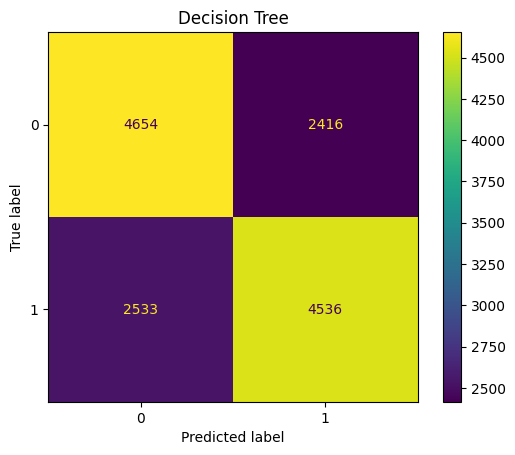

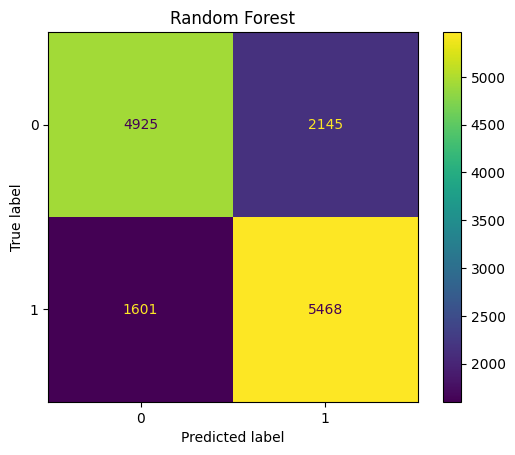

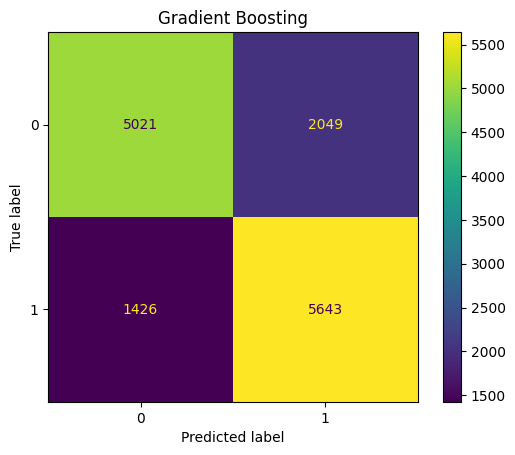

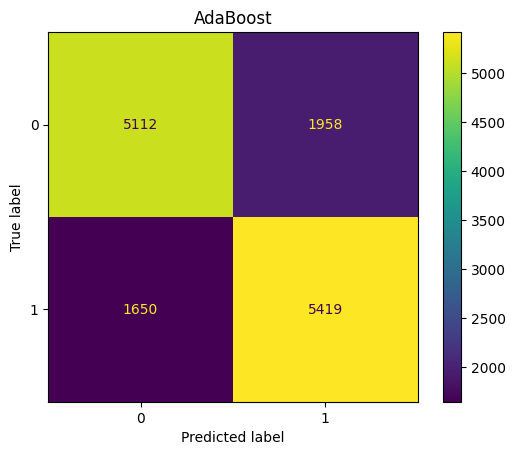

=== Model Comparison Table (sorted by F1-score) ===


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Gradient Boosting,0.754226,0.733619,0.798274,0.764582,0.829702
1,Logistic Regression,0.747295,0.738082,0.766587,0.752064,0.824979
2,AdaBoost,0.744819,0.734580,0.766587,0.750242,0.822319
3,Random Forest,0.735059,0.718245,0.773518,0.744858,0.811674
4,Decision Tree,0.649975,0.652474,0.641675,0.647029,0.650314



=== Best Model Based on F1-score ===
Model: Gradient Boosting
Accuracy: 0.7542
Precision: 0.7336
Recall: 0.7983
F1-score: 0.7646
ROC-AUC: 0.8297


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Gradient Boosting,0.754226,0.733619,0.798274,0.764582,0.829702
1,Logistic Regression,0.747295,0.738082,0.766587,0.752064,0.824979
2,AdaBoost,0.744819,0.734580,0.766587,0.750242,0.822319
3,Random Forest,0.735059,0.718245,0.773518,0.744858,0.811674
4,Decision Tree,0.649975,0.652474,0.641675,0.647029,0.650314


In [65]:
# =========================
# Evaluate all models + pick the best one
# (based on F1-score) + show confusion matrices
# =========================
# -------------------------
# Run evaluation for each model
# -------------------------
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict class labels
    y_pred = model.predict(X_test)

    # Predict probabilities for ROC-AUC (if supported)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = np.nan

    # Save metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": auc
    })

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format='d')
    plt.title(name)
    plt.show()

# Create results dataframe (sorted by F1-score)
results_df = pd.DataFrame(results).sort_values(by="F1-score", ascending=False).reset_index(drop=True)

print("=== Model Comparison Table (sorted by F1-score) ===")
display(results_df)

# -------------------------
# Identify the best model
# -------------------------
best_model_row = results_df.iloc[0]
best_model_name = best_model_row["Model"]
best_model = models[best_model_name]

print("\n=== Best Model Based on F1-score ===")
print("Model:", best_model_name)
print("Accuracy:", round(best_model_row["Accuracy"], 4))
print("Precision:", round(best_model_row["Precision"], 4))
print("Recall:", round(best_model_row["Recall"], 4))
print("F1-score:", round(best_model_row["F1-score"], 4))
print("ROC-AUC:", round(best_model_row["ROC-AUC"], 4))

# -------------------------
# Optional: Highlight the best row in the results table
# -------------------------
def highlight_best(row):
    return ["background-color: blue"] * len(row) if row["Model"] == best_model_name else [""] * len(row)

display(results_df.style.apply(highlight_best, axis=1))


### PROJECT PROGRESS 5
  - Model evaluation (sklearn)
  - Model evaluation
  - Over-fitting, under-fitting, and model selection
  - Ridge regression
  - Grid search
  - Model refinement


In [66]:
# Make sure column names are clean
df.columns = df.columns.str.strip()

# Use Diabetes_binary as target (if not exist, rename Diabetes_012 accordingly)
if 'Diabetes_binary' not in df.columns and 'Diabetes_012' in df.columns:
    df['Diabetes_012'] = df['Diabetes_012'].replace({2: 1})
    df = df.rename(columns={'Diabetes_012': 'Diabetes_binary'})

target = "Diabetes_binary"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [67]:
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        random_state=42
    )
}


In [71]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Probabilities for ROC-AUC (if available)
    y_proba_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_proba_test  = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics (train)
    train_metrics = {
        "Accuracy_train": accuracy_score(y_train, y_pred_train),
        "Precision_train": precision_score(y_train, y_pred_train, zero_division=0),
        "Recall_train": recall_score(y_train, y_pred_train, zero_division=0),
        "F1_train": f1_score(y_train, y_pred_train, zero_division=0),
        "ROC_AUC_train": roc_auc_score(y_train, y_proba_train) if y_proba_train is not None else np.nan
    }

    # Metrics (test)
    test_metrics = {
        "Accuracy_test": accuracy_score(y_test, y_pred_test),
        "Precision_test": precision_score(y_test, y_pred_test, zero_division=0),
        "Recall_test": recall_score(y_test, y_pred_test, zero_division=0),
        "F1_test": f1_score(y_test, y_pred_test, zero_division=0),
        "ROC_AUC_test": roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else np.nan
    }

    # Overfitting check (gap between train and test F1)
    gap = train_metrics["F1_train"] - test_metrics["F1_test"]

    return { "Model": name, **train_metrics, **test_metrics, "F1_gap(train-test)": gap }, model


In [69]:
baseline_results = []
fitted_models = {}

for name, model in models.items():
    row, fitted = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    baseline_results.append(row)
    fitted_models[name] = fitted

baseline_df = pd.DataFrame(baseline_results).sort_values(by="F1_test", ascending=False)
baseline_df


,Model,Accuracy_train,Precision_train,Recall_train,F1_train,ROC_AUC_train,Accuracy_test,Precision_test,Recall_test,F1_test,ROC_AUC_test,F1_gap(train-test)
3,Gradient Boosting,0.754849,0.735237,0.796548,0.764666,0.834567,0.754226,0.733619,0.798274,0.764582,0.829702,0.000084
0,Logistic Regression,0.749739,0.740041,0.769954,0.754701,0.826933,0.747295,0.738082,0.766587,0.752064,0.824979,0.002637
4,AdaBoost,0.746645,0.737430,0.766064,0.751474,0.823626,0.744819,0.734580,0.766587,0.750242,0.822319,0.001232
2,Random Forest,0.994837,0.996135,0.993528,0.994830,0.999749,0.735059,0.718245,0.773518,0.744858,0.811674,0.249972
1,Decision Tree,0.994837,0.999286,0.990381,0.994814,0.999945,0.649975,0.652474,0.641675,0.647029,0.650314,0.347784


In [72]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

cv_results = []

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    cv_results.append({
        "Model": name,
        "CV_Accuracy_mean": scores["test_accuracy"].mean(),
        "CV_Precision_mean": scores["test_precision"].mean(),
        "CV_Recall_mean": scores["test_recall"].mean(),
        "CV_F1_mean": scores["test_f1"].mean(),
        "CV_ROC_AUC_mean": scores["test_roc_auc"].mean()
    })

cv_df = pd.DataFrame(cv_results).sort_values(by="CV_F1_mean", ascending=False)
cv_df


,Model,CV_Accuracy_mean,CV_Precision_mean,CV_Recall_mean,CV_F1_mean,CV_ROC_AUC_mean
3,Gradient Boosting,0.752476,0.733048,0.794177,0.762378,0.830704
0,Logistic Regression,0.748840,0.739322,0.768743,0.753736,0.826317
4,AdaBoost,0.745544,0.737006,0.763594,0.750040,0.822587
2,Random Forest,0.738174,0.720323,0.778730,0.748379,0.810651
1,Decision Tree,0.656920,0.659752,0.648051,0.653848,0.656797


In [56]:
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"]
    },
    "Decision Tree": {
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": [2, 10, 20],
        "min_samples_leaf": [1, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 10],
        "min_samples_leaf": [1, 5]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [2, 3]
    },
    "AdaBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1, 0.5]
    }
}



Running GridSearchCV for: Logistic Regression

Running GridSearchCV for: Decision Tree

Running GridSearchCV for: Random Forest

Running GridSearchCV for: Gradient Boosting

Running GridSearchCV for: AdaBoost

=== Best Tuned Model (GridSearchCV) ===
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best CV F1: 0.7626

=== Tuned Models: TEST Set Results (Sorted by Test_F1) ===
              Model  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_ROC_AUC
  Gradient Boosting       0.755004        0.734000     0.799830 0.765502      0.830430
      Random Forest       0.748992        0.728750     0.793181 0.759602      0.828377
           AdaBoost       0.748497        0.736757     0.773235 0.754555      0.825840
Logistic Regression       0.746941        0.737709     0.766304 0.751735      0.824986
      Decision Tree       0.730603        0.711853     0.774791 0.741990      0.805787


,Model,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC
0,Gradient Boosting,0.755004,0.734000,0.799830,0.765502,0.830430
1,Random Forest,0.748992,0.728750,0.793181,0.759602,0.828377
2,AdaBoost,0.748497,0.736757,0.773235,0.754555,0.825840
3,Logistic Regression,0.746941,0.737709,0.766304,0.751735,0.824986
4,Decision Tree,0.730603,0.711853,0.774791,0.741990,0.805787


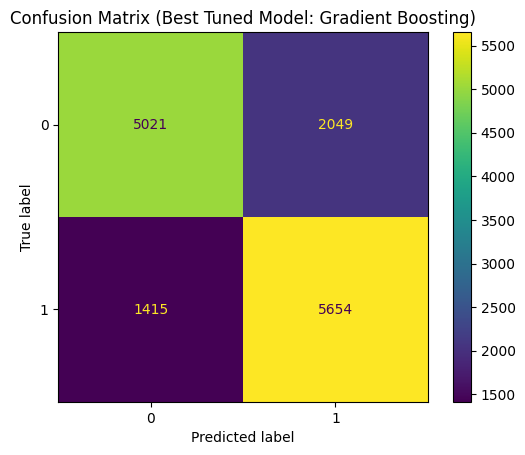


=== Final Best Model Decision (Based on TEST F1) ===
Best Model: Gradient Boosting
Test Accuracy : 0.755
Test Precision: 0.734
Test Recall   : 0.7998
Test F1       : 0.7655
Test ROC-AUC  : 0.8304


In [59]:

# -------------------------
# 1) Run GridSearchCV for each model
# -------------------------
best_models = {}
grid_summary = []

for name, model in models.items():
    print(f"\nRunning GridSearchCV for: {name}")

    if name not in param_grids:
        raise KeyError(f"param_grids does not contain a grid for '{name}'. Add it to param_grids first.")

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring="f1",     # Good for imbalanced classification (balances precision & recall)
        cv=cv,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    grid_summary.append({
        "Model": name,
        "Best_Params": grid.best_params_,
        "Best_CV_F1": grid.best_score_
    })

# Create GridSearch summary dataframe
grid_df = pd.DataFrame(grid_summary).sort_values(by="Best_CV_F1", ascending=False).reset_index(drop=True)

# -------------------------
# 2) Show FULL GridSearch results (no truncation)
# -------------------------
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# print("\n=== Grid Search CV Results (FULL) ===")
# print(grid_df.to_string(index=False))
# display(grid_df)

# -------------------------
# 3) Identify the best tuned model (by CV F1-score)
# -------------------------
best_grid_row = grid_df.iloc[0]
best_model_name = best_grid_row["Model"]
best_model = best_models[best_model_name]

print("\n=== Best Tuned Model (GridSearchCV) ===")
print("Model:", best_model_name)
print("Best Parameters:", best_grid_row["Best_Params"])
print("Best CV F1:", round(float(best_grid_row["Best_CV_F1"]), 4))

# -------------------------
# 4) Evaluate ALL tuned models on the TEST SET (recommended)
# -------------------------
test_results = []

for name, tuned_model in best_models.items():
    y_pred = tuned_model.predict(X_test)

    # ROC-AUC needs probabilities (if available)
    if hasattr(tuned_model, "predict_proba"):
        y_proba = tuned_model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = np.nan

    test_results.append({
        "Model": name,
        "Test_Accuracy": accuracy_score(y_test, y_pred),
        "Test_Precision": precision_score(y_test, y_pred, zero_division=0),
        "Test_Recall": recall_score(y_test, y_pred, zero_division=0),
        "Test_F1": f1_score(y_test, y_pred, zero_division=0),
        "Test_ROC_AUC": auc
    })

test_df = pd.DataFrame(test_results).sort_values(by="Test_F1", ascending=False).reset_index(drop=True)

print("\n=== Tuned Models: TEST Set Results (Sorted by Test_F1) ===")
print(test_df.to_string(index=False))
display(test_df)

# -------------------------
# 5) Confusion Matrix for the BEST tuned model on TEST SET
# -------------------------
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d")
plt.title(f"Confusion Matrix (Best Tuned Model: {best_model_name})")
plt.show()

# -------------------------
# 6) Final decision message (best tuned model based on TEST F1)
# -------------------------
best_test_row = test_df.iloc[0]
best_test_model_name = best_test_row["Model"]

print("\n=== Final Best Model Decision (Based on TEST F1) ===")
print("Best Model:", best_test_model_name)
print("Test Accuracy :", round(float(best_test_row['Test_Accuracy']), 4))
print("Test Precision:", round(float(best_test_row['Test_Precision']), 4))
print("Test Recall   :", round(float(best_test_row['Test_Recall']), 4))
print("Test F1       :", round(float(best_test_row['Test_F1']), 4))
print("Test ROC-AUC  :", round(float(best_test_row['Test_ROC_AUC']), 4) if not pd.isna(best_test_row["Test_ROC_AUC"]) else "N/A")


In [73]:
refined_results = []

for name, best_model in best_models.items():
    row, fitted = evaluate_model(name, best_model, X_train, y_train, X_test, y_test)
    refined_results.append(row)

refined_df = pd.DataFrame(refined_results).sort_values(by="F1_test", ascending=False)
refined_df


,Model,Accuracy_train,Precision_train,Recall_train,F1_train,ROC_AUC_train,Accuracy_test,Precision_test,Recall_test,F1_test,ROC_AUC_test,F1_gap(train-test)
3,Gradient Boosting,0.757855,0.737099,0.801641,0.768016,0.837076,0.755004,0.734000,0.799830,0.765502,0.830430,0.002514
2,Random Forest,0.815996,0.792766,0.855678,0.823021,0.910417,0.748992,0.728750,0.793181,0.759602,0.828377,0.063419
4,AdaBoost,0.748979,0.737895,0.772288,0.754700,0.827340,0.748497,0.736757,0.773235,0.754555,0.825840,0.000145
0,Logistic Regression,0.749598,0.739905,0.769813,0.754563,0.826936,0.746941,0.737709,0.766304,0.751735,0.824986,0.002828
1,Decision Tree,0.735204,0.717239,0.776568,0.745725,0.809309,0.730603,0.711853,0.774791,0.741990,0.805787,0.003735


 >> Final selected model: Gradient Boosting


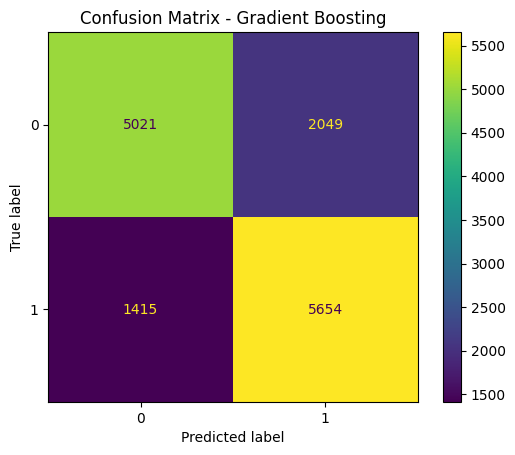

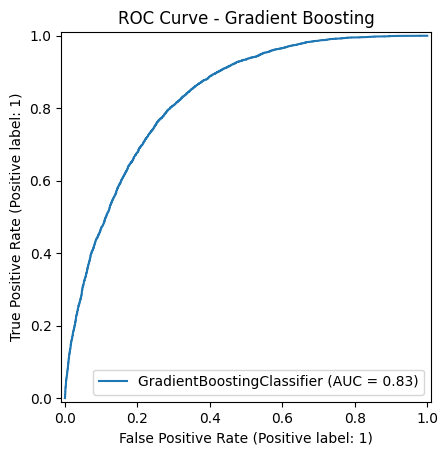

In [74]:
best_name = refined_df.iloc[0]["Model"]
final_model = best_models[best_name]

print(" >> Final selected model:", best_name)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(values_format="d")
plt.title(f"Confusion Matrix - {best_name}")
plt.show()

# ROC curve (only if predict_proba exists)
if hasattr(final_model, "predict_proba"):
    RocCurveDisplay.from_estimator(final_model, X_test, y_test)
    plt.title(f"ROC Curve - {best_name}")
    plt.show()



=== Permutation Importance (Best Model) ===
Scoring metric: F1
Top 10 features:
GenHlth                 0.054586
BMI                     0.030988
Age                     0.027614
HighBP                  0.020624
HighChol                0.008826
CholCheck               0.003270
Income                  0.002843
Sex                     0.002340
HvyAlcoholConsump       0.001839
HeartDiseaseorAttack    0.001081
dtype: float64


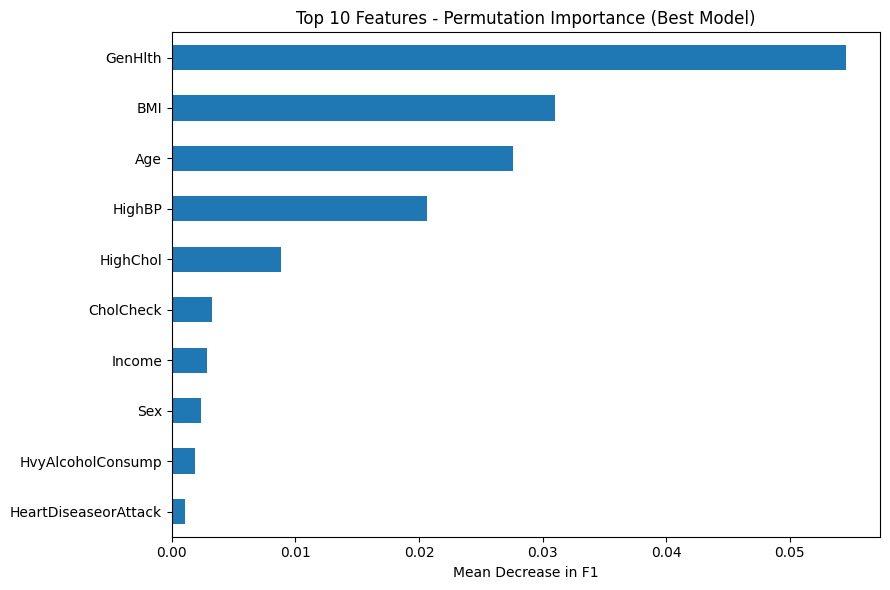


Training + Permutation Importance for: Logistic Regression

=== Permutation Importance (Logistic Regression) ===
Scoring metric: F1
Top 10 features:
GenHlth              0.053321
BMI                  0.035503
Age                  0.028523
HighBP               0.021051
HighChol             0.010760
CholCheck            0.004778
HvyAlcoholConsump    0.002981
Income               0.002273
Sex                  0.002086
DiffWalk             0.001260
dtype: float64


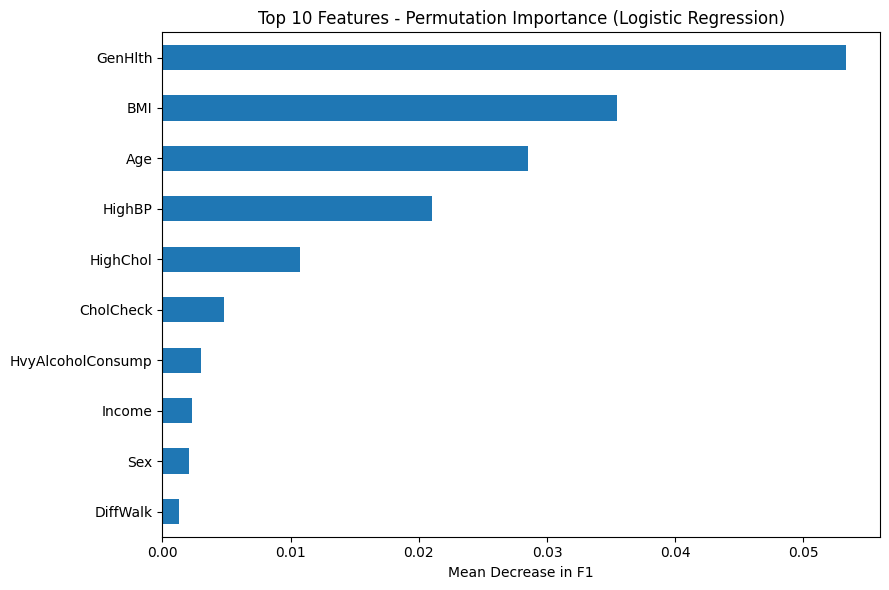


Training + Permutation Importance for: Decision Tree

=== Permutation Importance (Decision Tree) ===
Scoring metric: F1
Top 10 features:
GenHlth                 0.030540
BMI                     0.018497
Age                     0.017765
HighBP                  0.016358
HighChol                0.006696
Income                  0.005480
HeartDiseaseorAttack    0.005273
HvyAlcoholConsump       0.003880
Education               0.002459
DiffWalk                0.002201
dtype: float64


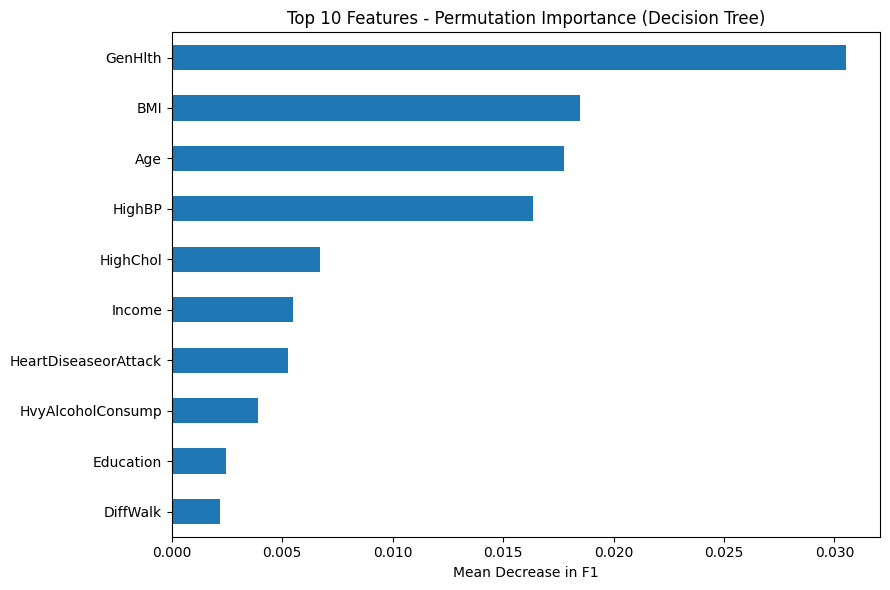


Training + Permutation Importance for: Random Forest

=== Permutation Importance (Random Forest) ===
Scoring metric: F1
Top 10 features:
GenHlth                 0.030416
BMI                     0.025536
Age                     0.019858
HighBP                  0.016897
HighChol                0.007643
CholCheck               0.002803
HvyAlcoholConsump       0.002724
HeartDiseaseorAttack    0.002194
Sex                     0.000885
Stroke                  0.000408
dtype: float64


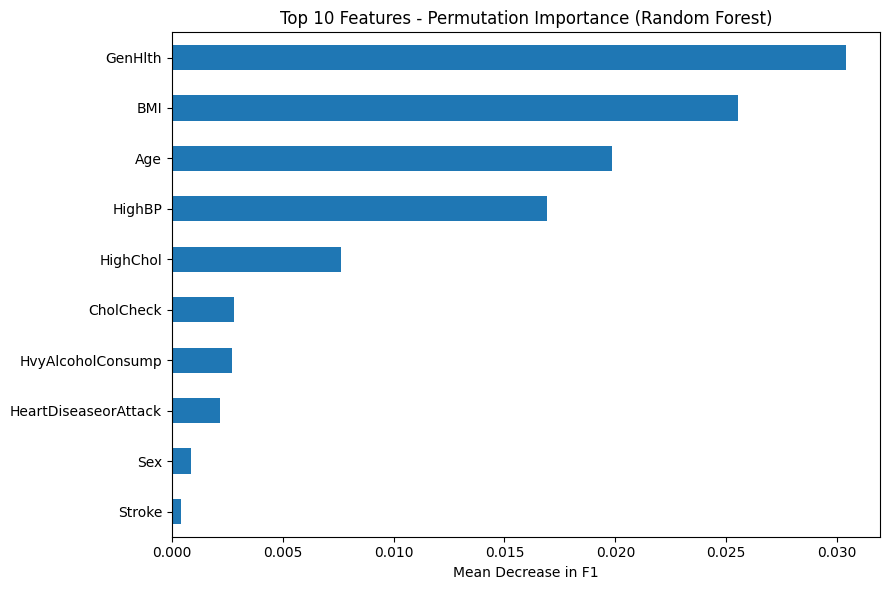


Training + Permutation Importance for: Gradient Boosting

=== Permutation Importance (Gradient Boosting) ===
Scoring metric: F1
Top 10 features:
GenHlth              0.042747
BMI                  0.032455
Age                  0.029663
HighBP               0.017677
HighChol             0.010317
Sex                  0.004924
CholCheck            0.004868
HvyAlcoholConsump    0.004361
Income               0.001812
MentHlth             0.001684
dtype: float64


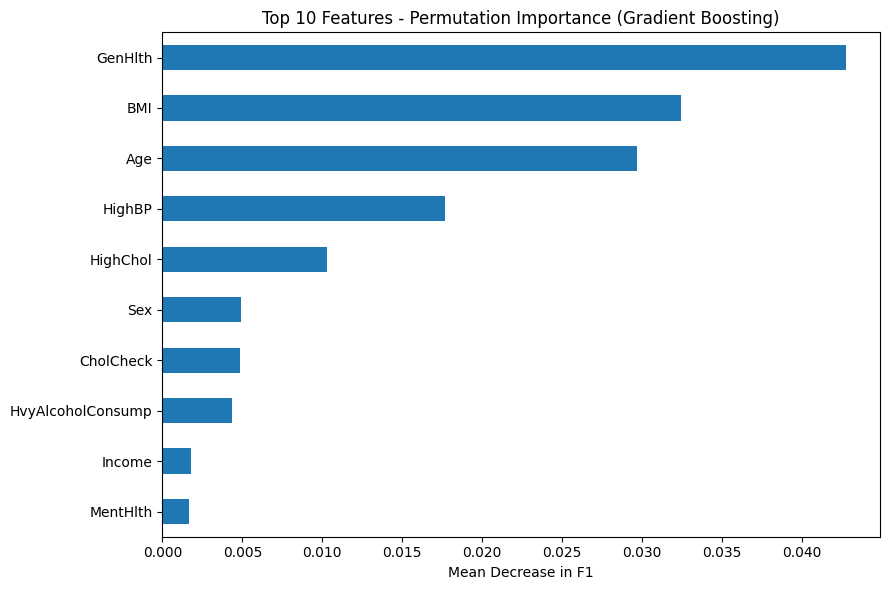


Training + Permutation Importance for: AdaBoost

=== Permutation Importance (AdaBoost) ===
Scoring metric: F1
Top 10 features:
GenHlth                 0.053893
HighBP                  0.026727
BMI                     0.026703
Age                     0.022647
HighChol                0.009083
CholCheck               0.002673
Income                  0.002194
HeartDiseaseorAttack    0.001994
Sex                     0.001632
HvyAlcoholConsump       0.001479
dtype: float64


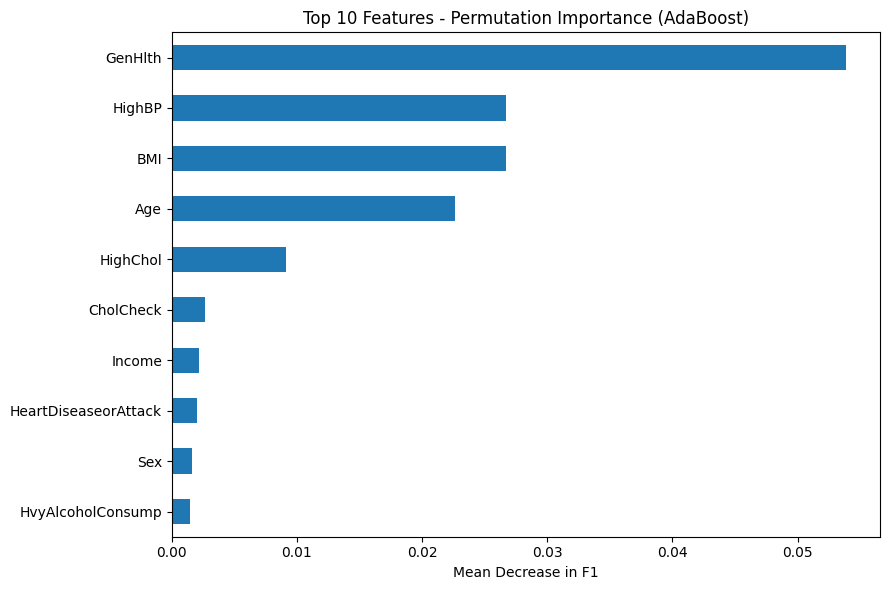


=== Comparison Table (Top features per model; missing filled with 0) ===


,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,AdaBoost
Age,0.028523,0.017765,0.019858,0.029663,0.022647
BMI,0.035503,0.018497,0.025536,0.032455,0.026703
CholCheck,0.004778,0.000000,0.002803,0.004868,0.002673
DiffWalk,0.001260,0.002201,0.000000,0.000000,0.000000
Education,0.000000,0.002459,0.000000,0.000000,0.000000
GenHlth,0.053321,0.030540,0.030416,0.042747,0.053893
HeartDiseaseorAttack,0.000000,0.005273,0.002194,0.000000,0.001994
HighBP,0.021051,0.016358,0.016897,0.017677,0.026727
HighChol,0.010760,0.006696,0.007643,0.010317,0.009083
HvyAlcoholConsump,0.002981,0.003880,0.002724,0.004361,0.001479


In [75]:
# =========================
# Permutation Feature Importance (Works for ANY sklearn model)
# - Computes feature importance using permutation_importance
# - Prints Top N features
# - Plots Top N features
# - Can run on: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, etc.
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

# -------------------------
# 1) Function: model-agnostic permutation importance
# -------------------------
def permutation_importance_any_model(
    model,
    X_test,
    y_test,
    model_name="Model",
    scoring="f1",
    n_repeats=10,
    top_n=10,
    random_state=42
):
    """
    Compute + plot permutation feature importance for ANY trained sklearn model.

    Parameters:
    - model: fitted sklearn model
    - X_test, y_test: test set
    - model_name: label for printing/plot title
    - scoring: metric used for permutation importance ("f1", "accuracy", etc.)
    - n_repeats: number of shuffles per feature
    - top_n: number of top features to show
    """
    # Compute permutation importance
    result = permutation_importance(
        model,
        X_test,
        y_test,
        scoring=scoring,
        n_repeats=n_repeats,
        random_state=random_state
    )

    # Put into Series and sort
    importance = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)

    # Print top features
    print(f"\n=== Permutation Importance ({model_name}) ===")
    print(f"Scoring metric: {scoring.upper()}")
    print(f"Top {top_n} features:")
    print(importance.head(top_n))

    # Plot top features (horizontal bar chart)
    plt.figure(figsize=(9, 6))
    importance.head(top_n).sort_values().plot(kind="barh")
    plt.title(f"Top {top_n} Features - Permutation Importance ({model_name})")
    plt.xlabel(f"Mean Decrease in {scoring.upper()}")
    plt.tight_layout()
    plt.show()

    return importance


# -------------------------
# 2) Pre-checks (what must exist)
# -------------------------
required_vars = ["X_train", "y_train", "X_test", "y_test"]
missing = [v for v in required_vars if v not in globals()]
if missing:
    raise NameError(
        f"Missing required variables: {missing}\n"
        "Make sure you have already created X_train, y_train, X_test, y_test."
    )


# -------------------------
# 3) Choose which model(s) to run
# -------------------------
# Option A: Run on ONE final selected model (recommended)
# If you already selected best model (e.g., best_model from GridSearch):
if "best_model" in globals():
    # Ensure it's trained (GridSearch best_model should already be fitted, but safe to fit again)
    best_model.fit(X_train, y_train)

    permutation_importance_any_model(
        model=best_model,
        X_test=X_test,
        y_test=y_test,
        model_name="Best Model",
        scoring="f1",
        n_repeats=10,
        top_n=10
    )

# Option B: Run on EVERY model in your models dictionary (if models exists)
# This will train each model, compute importance, and store all results.
if "models" in globals():
    all_importances = {}

    for name, model in models.items():
        print(f"\nTraining + Permutation Importance for: {name}")

        # Train model first
        model.fit(X_train, y_train)

        # Compute & plot permutation importance
        imp = permutation_importance_any_model(
            model=model,
            X_test=X_test,
            y_test=y_test,
            model_name=name,
            scoring="f1",
            n_repeats=10,
            top_n=10
        )

        all_importances[name] = imp

    # -------------------------
    # 4) Optional: Create a comparison table of Top features across models
    # -------------------------
    # This table keeps only the top 10 features per model and aligns them by feature name.
    top_n = 10
    comparison_df = pd.DataFrame({
        model_name: imp.head(top_n)
        for model_name, imp in all_importances.items()
    }).fillna(0)

    print("\n=== Comparison Table (Top features per model; missing filled with 0) ===")
    display(comparison_df)
